___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


# EDA

In [5]:
df = df.astype({"sex": str, "cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })

In [6]:
df = pd.get_dummies(df, drop_first= True )

In [7]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

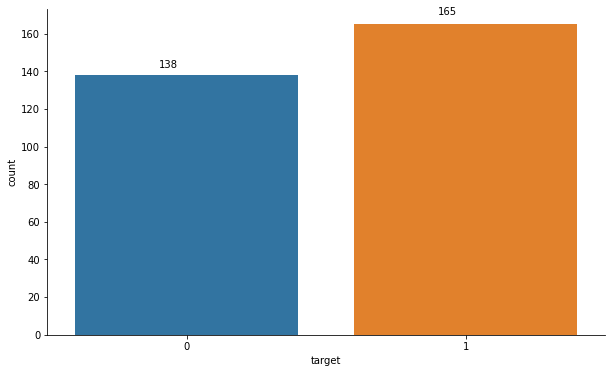

In [9]:
ax = sns.countplot(df.target)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

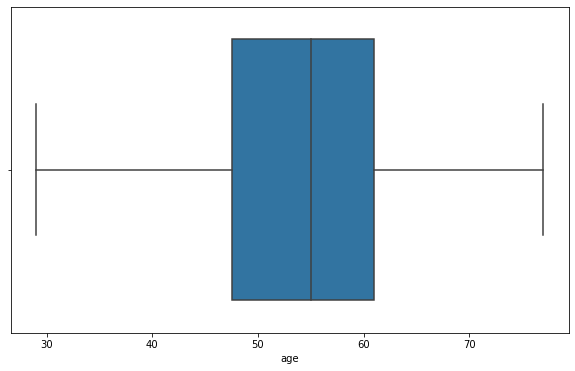

In [14]:
sns.boxplot(df.age);

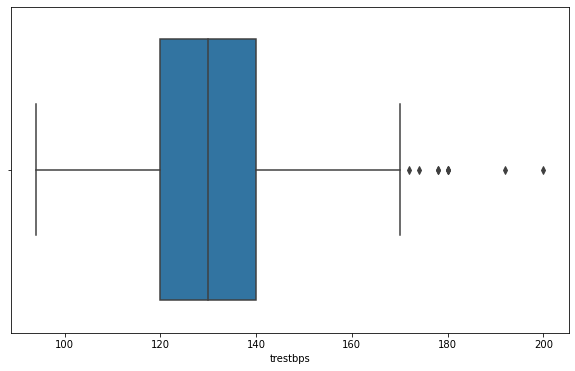

In [17]:
sns.boxplot(df.trestbps);

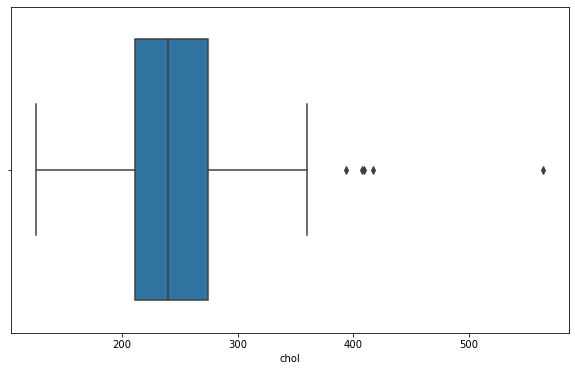

In [18]:
sns.boxplot(df.chol);

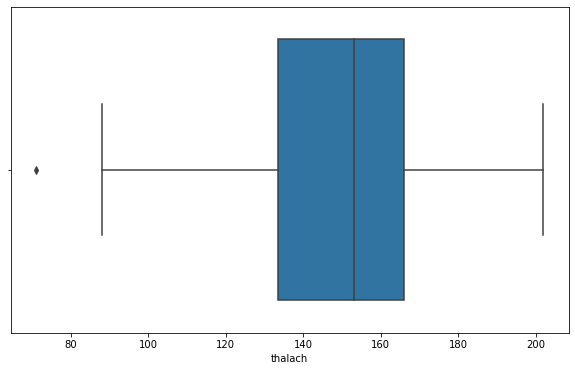

In [21]:
sns.boxplot(df.thalach);

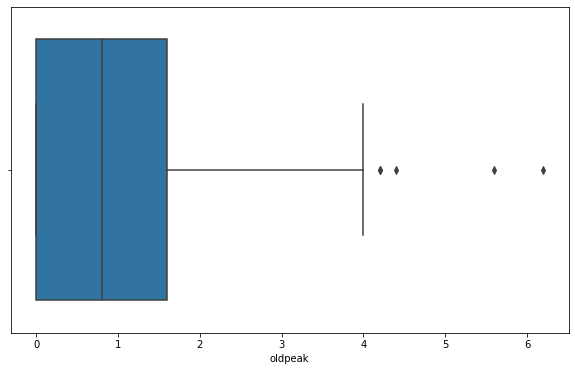

In [23]:
sns.boxplot(df.oldpeak);

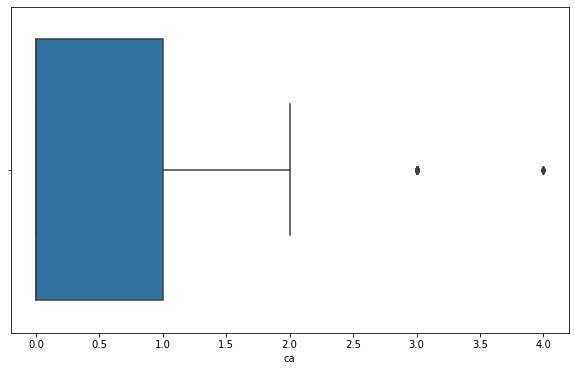

In [25]:
sns.boxplot(df.ca);

In [27]:
df.shape

(303, 20)

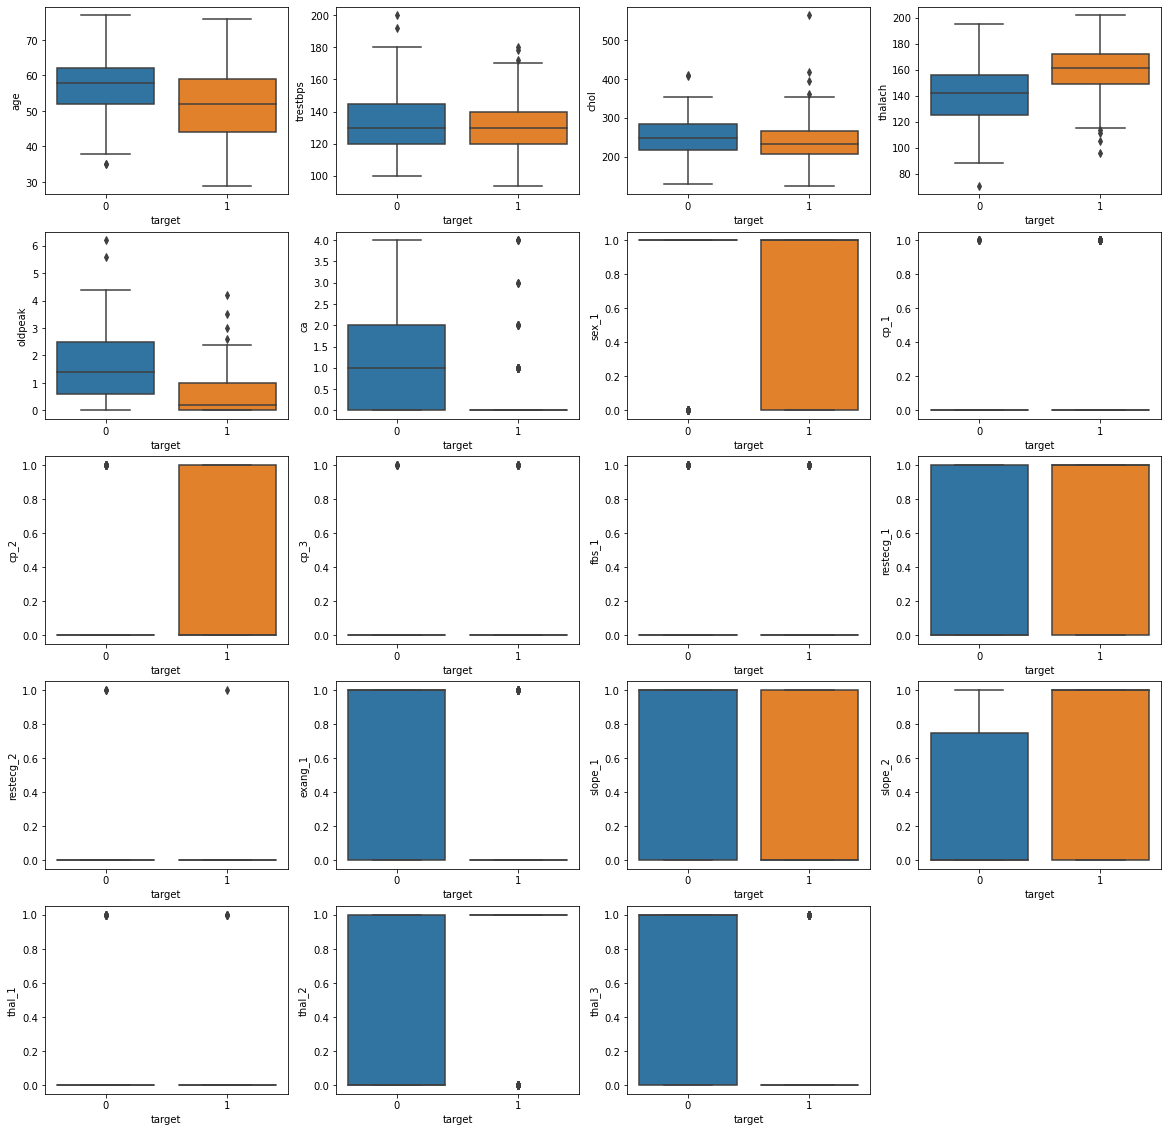

In [30]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(5,4,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

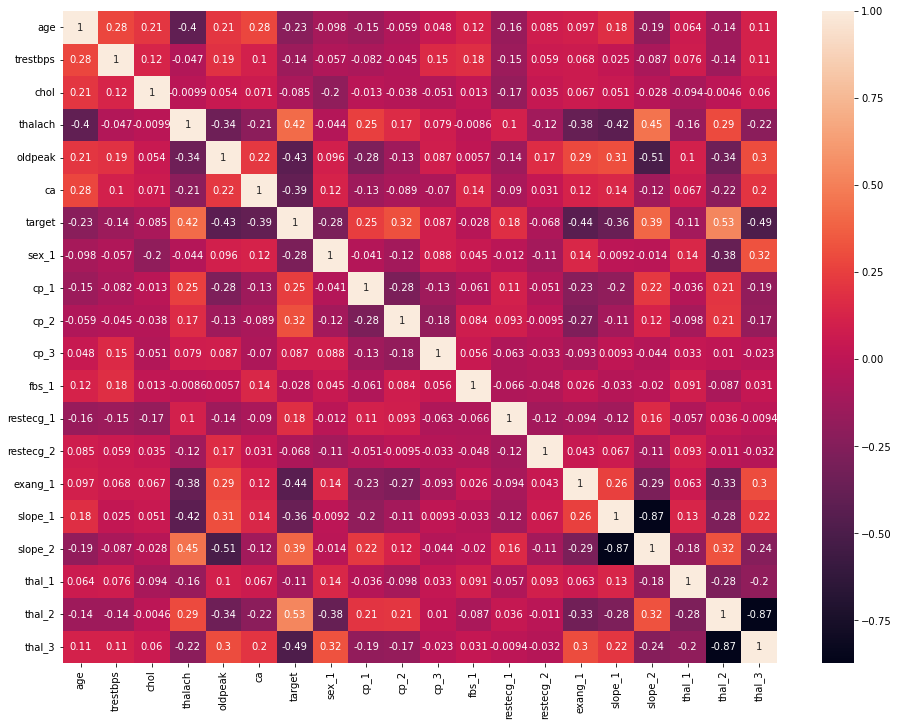

In [31]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

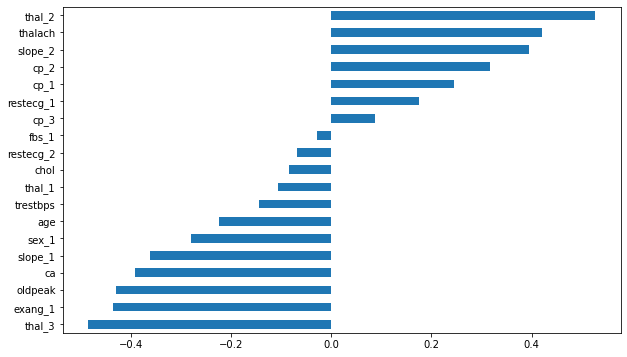

In [32]:
df.corr()["target"].drop("target").sort_values().plot.barh()

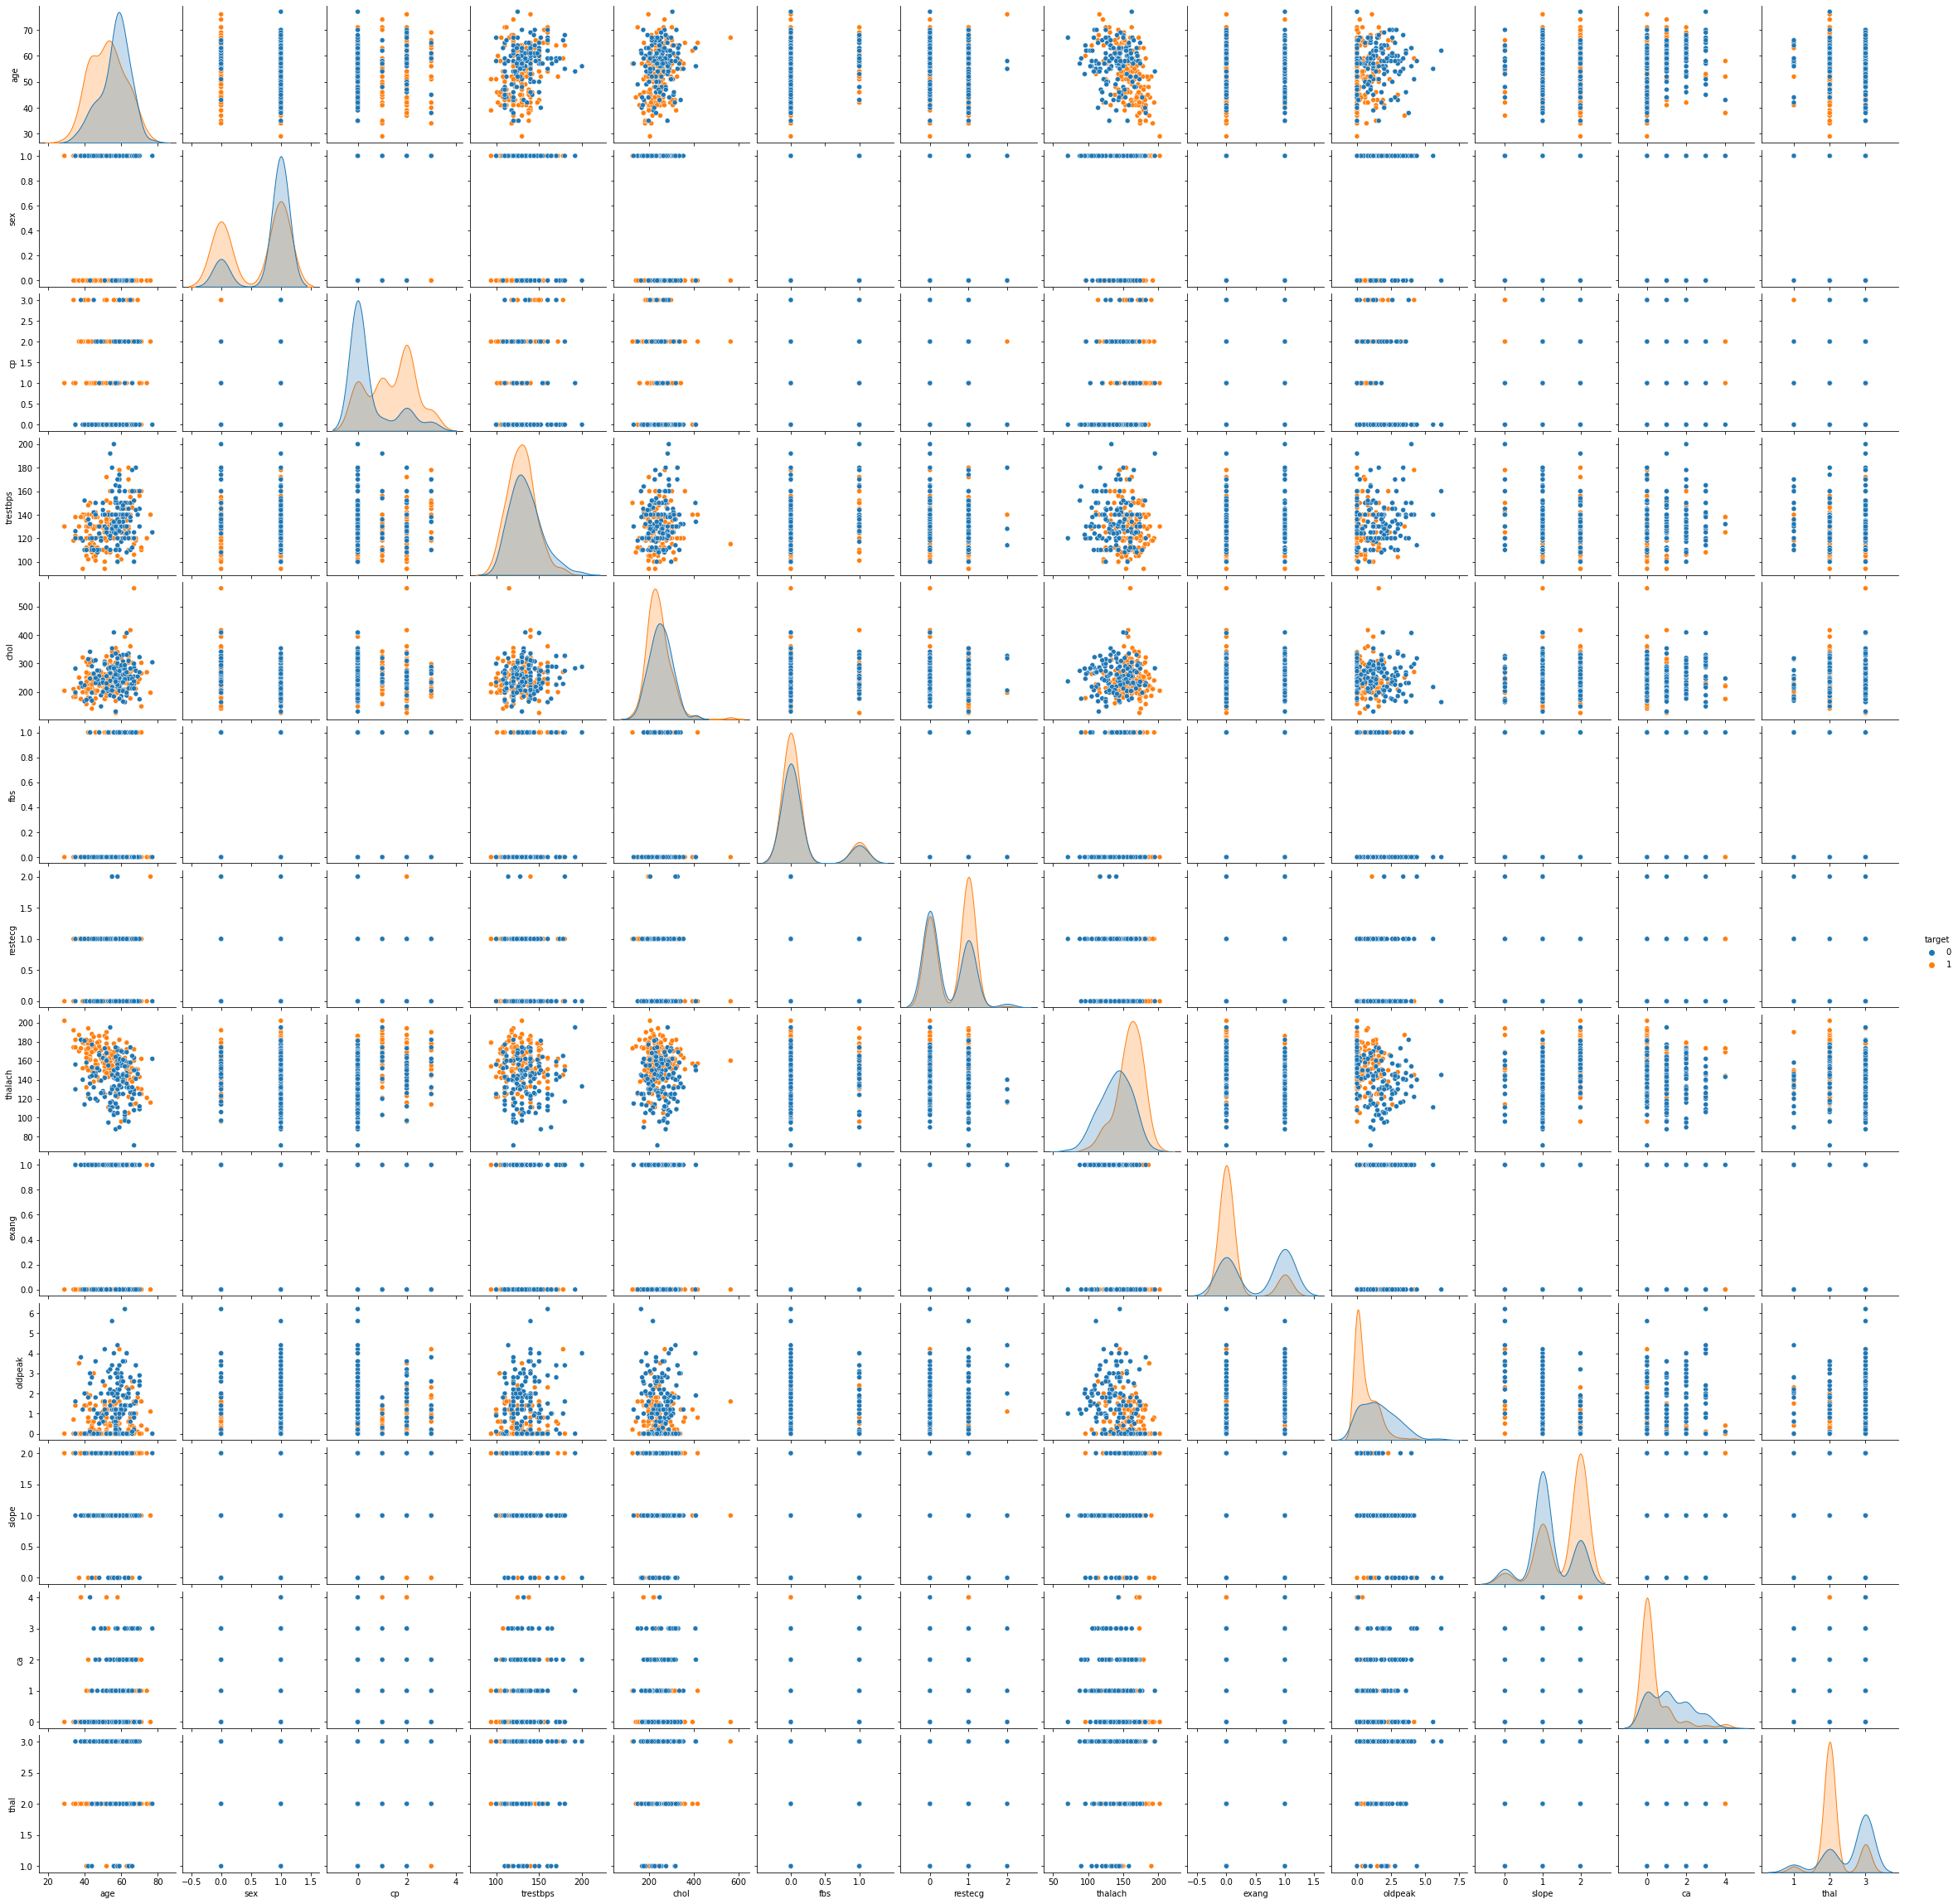

In [28]:
sns.pairplot(df, hue = "target")

In [33]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca', 'target']]
df_cont

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.300,0,1
1,37,130,250,187,3.500,0,1
2,41,130,204,172,1.400,0,1
3,56,120,236,178,0.800,0,1
4,57,120,354,163,0.600,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0
299,45,110,264,132,1.200,0,0
300,68,144,193,141,3.400,2,0
301,57,130,131,115,1.200,1,0


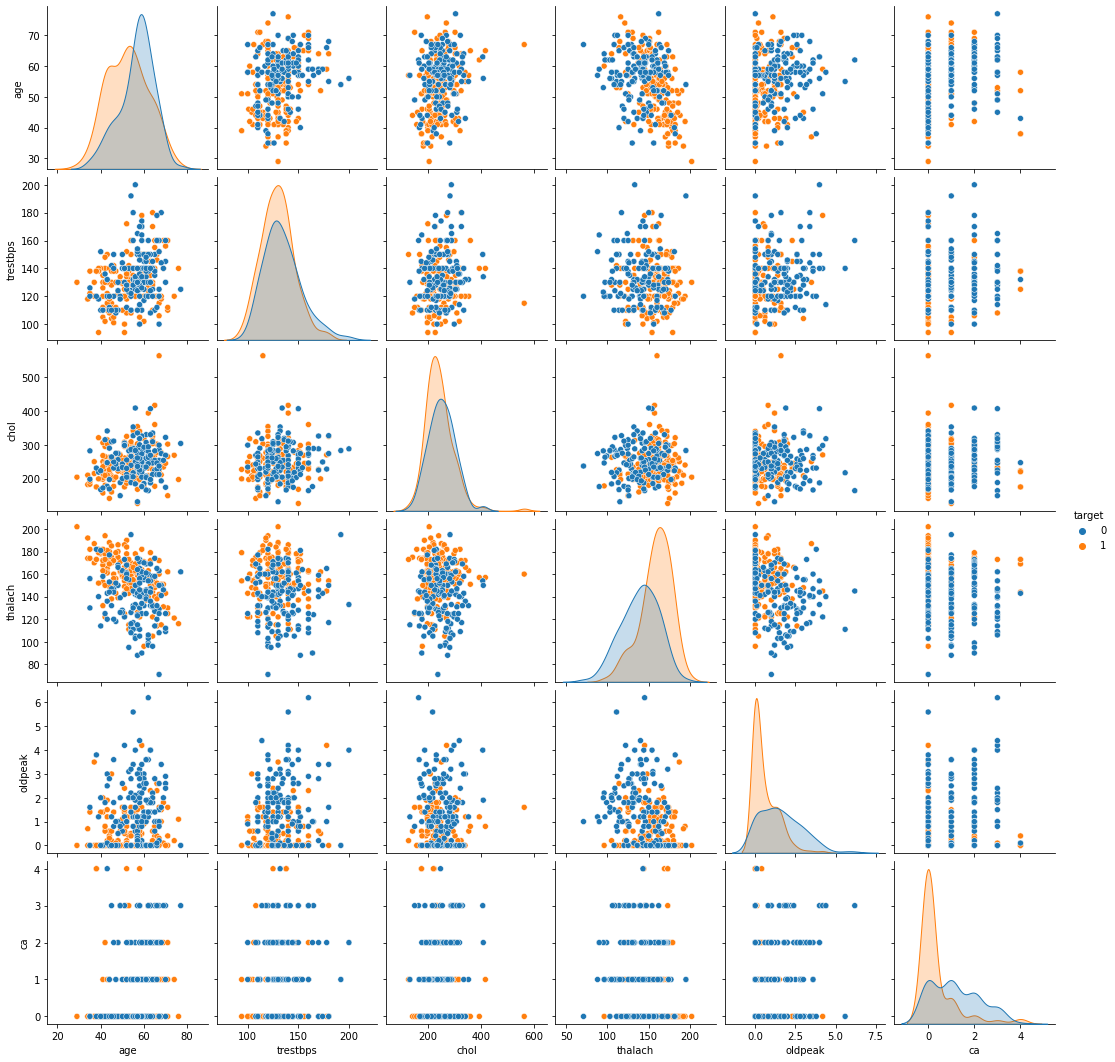

In [34]:
sns.pairplot(df_cont, hue = 'target'); 

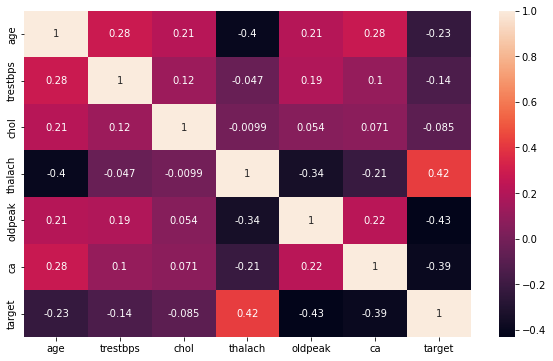

In [35]:
sns.heatmap(df_cont.corr(), annot = True);

In [37]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [36]:
df_get_dummy = df[['sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'target']]
df_get_dummy

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target
0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,1,0,1,1,0,0,0,1,0
299,1,0,0,1,0,1,0,0,1,0,0,0,1,0
300,1,0,0,0,1,1,0,0,1,0,0,0,1,0
301,1,0,0,0,0,1,0,1,1,0,0,0,1,0


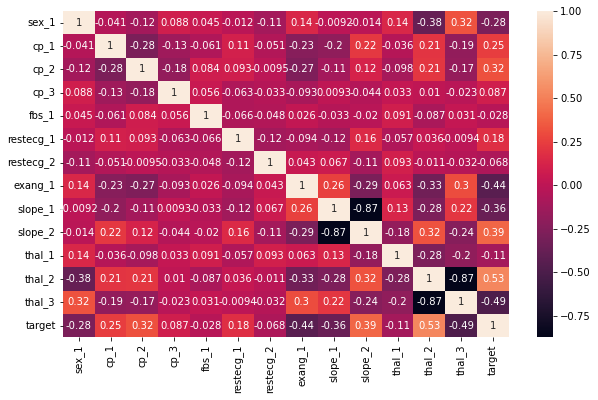

In [38]:
sns.heatmap(df_get_dummy.corr(), annot = True);

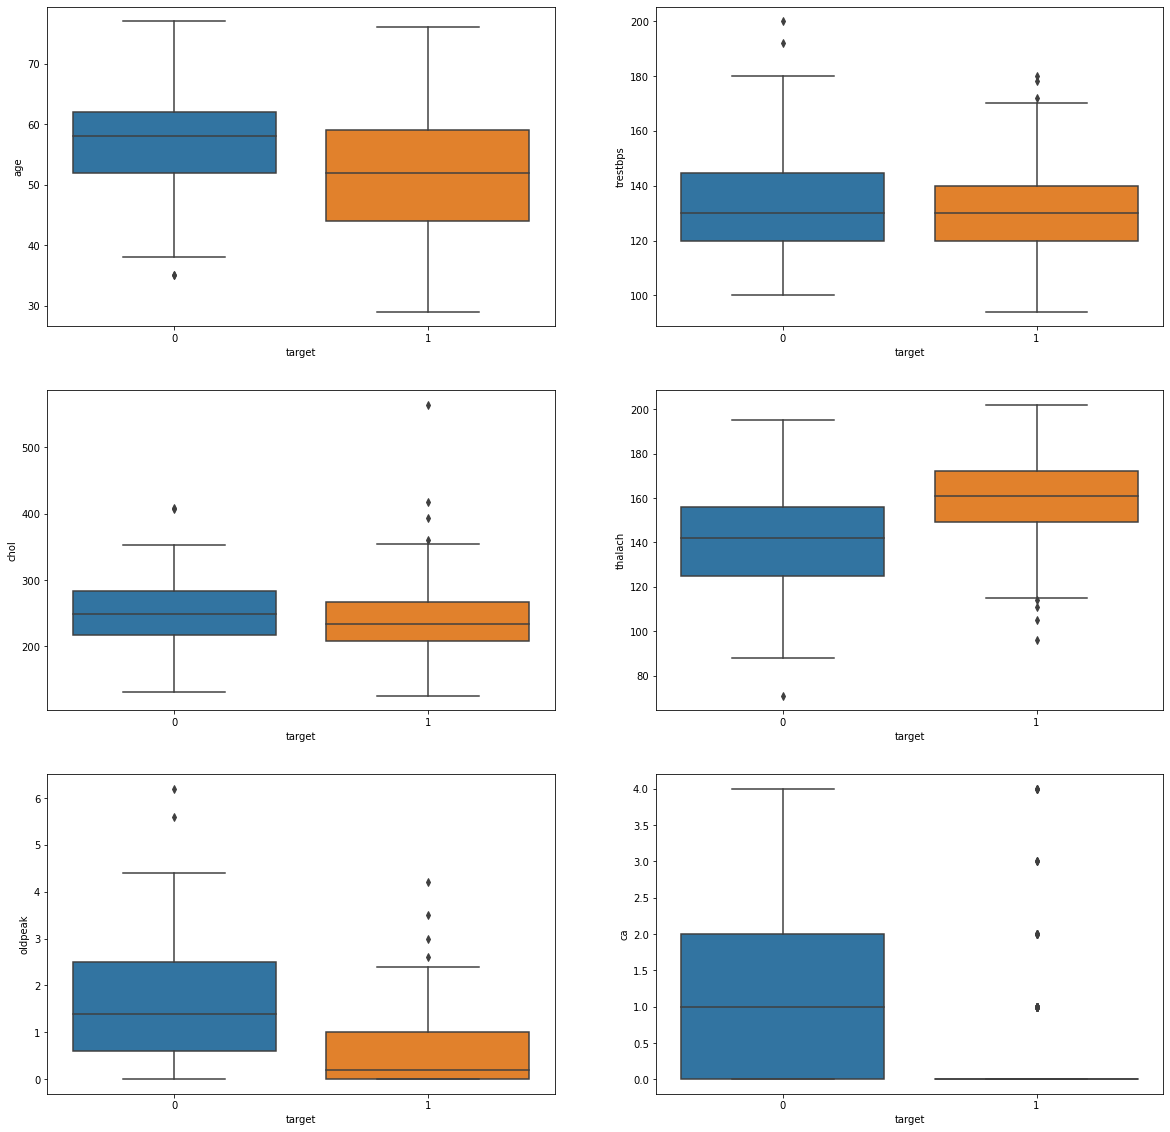

In [39]:
index = 0
plt.figure(figsize=(20,20))
for feature in df_cont.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x = 'target', y = feature, data = df_cont)

# Data Preprocessing

## Train | Test Split and Scaling

In [40]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.61047991,  0.46184018, -0.12323542, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.28205058,  1.57559529,  0.02336627, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 0.0778097 , -0.20641288, -0.83530077, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.36009607, -0.65191492,  1.04957809, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 0.0778097 , -0.09503737,  0.35845584, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.0630977 ,  2.68935039,  1.67787105, ..., -0.24779731,
         0.93593215, -0.82495791]])

In [45]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.29676259,  1.01871774,  0.65165922, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 1.39152703, -0.37347614,  0.19091106, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.90747829,  0.46184018,  1.38466767, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.03166674, -1.20879247, -0.12323542, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [ 0.40623903,  1.01871774,  0.52600063, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.57904896, -0.09503737,  0.44222824, ..., -0.24779731,
         0.93593215, -0.82495791]])

# Implement Logistic Regression and Evaluate

## Modelling

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model=LogisticRegression()

In [48]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
df.shape

(303, 20)

In [50]:
log_model.coef_

array([[ 0.05112223, -0.15830979, -0.55019996,  0.33830234, -0.45297164,
        -0.53722558, -0.57453581,  0.42085699,  0.85652289,  0.50622193,
        -0.06374748,  0.26749763, -0.07263897, -0.41445368, -0.2149557 ,
         0.15885716,  0.02436584,  0.36190068, -0.47054727]])

In [51]:
log_model.intercept_

array([0.19743871])

## Predicting

In [52]:
y_pred=log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [53]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.96179293, 0.03820707],
       [0.89192128, 0.10807872],
       [0.9931363 , 0.0068637 ],
       [0.1705224 , 0.8294776 ],
       [0.41717695, 0.58282305],
       [0.93539127, 0.06460873],
       [0.06566554, 0.93433446],
       [0.68125946, 0.31874054],
       [0.0122093 , 0.9877907 ],
       [0.55610944, 0.44389056],
       [0.89912833, 0.10087167],
       [0.39842961, 0.60157039],
       [0.94158555, 0.05841445],
       [0.02389499, 0.97610501],
       [0.01162699, 0.98837301],
       [0.13592212, 0.86407788],
       [0.0264357 , 0.9735643 ],
       [0.29603967, 0.70396033],
       [0.25360494, 0.74639506],
       [0.26230565, 0.73769435],
       [0.15298498, 0.84701502],
       [0.86195931, 0.13804069],
       [0.05796646, 0.94203354],
       [0.0797568 , 0.9202432 ],
       [0.0453204 , 0.9546796 ],
       [0.98059831, 0.01940169],
       [0.89075071, 0.10924929],
       [0.48004752, 0.51995248],
       [0.78553686, 0.21446314],
       [0.09476906, 0.90523094],
       [0.

In [54]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred,pred_proba
236,58,125,300,171,0.000,2,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0.110
217,63,130,330,132,1.800,3,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0.005
268,54,122,286,116,3.200,2,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0.019
271,61,134,234,145,2.600,2,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0.688
285,46,140,311,120,1.800,2,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0.007
4,57,120,354,163,0.600,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0.642
141,43,115,303,181,1.200,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0.520
142,42,120,209,173,0.000,0,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0.990
107,45,138,236,152,0.200,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0.602
160,56,120,240,169,0.000,0,1,1,0,0,...,0,0,0,0,0,1,0,1,1,0.934


## Model Performance on Classification Tasks

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [57]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



## Cross Validate

In [58]:
from sklearn.model_selection import cross_validate

In [59]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.008,0.003,0.857,0.857,0.857,0.840
2,0.004,0.002,0.800,0.857,0.828,0.800
3,0.003,0.002,0.786,0.846,0.815,0.792
4,0.003,0.002,0.800,0.923,0.857,0.833
5,0.003,0.002,0.923,0.923,0.923,0.917
6,0.003,0.002,0.714,0.769,0.741,0.708
7,0.005,0.004,0.857,0.923,0.889,0.875
8,0.003,0.002,0.917,0.846,0.880,0.875
9,0.005,0.002,0.917,0.846,0.880,0.875
10,0.004,0.002,0.812,1.000,0.897,0.875


In [60]:
df_scores.mean()[2:]

test_precision   0.838
test_recall      0.879
test_f1          0.857
test_accuracy    0.839
dtype: float64

In [61]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



## Cross Validate for 0 class

In [62]:
import sklearn
#sklearn.metrics.SCORERS.keys()

In [63]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)   # target 1 olan icin, sifirda da ayni islemleri yapiyor.
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [64]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.005,0.003,0.818,0.818,0.818
2,0.005,0.002,0.800,0.727,0.762
3,0.004,0.003,0.800,0.727,0.762
4,0.005,0.003,0.889,0.727,0.800
5,0.005,0.002,0.909,0.909,0.909
6,0.004,0.002,0.700,0.636,0.667
7,0.004,0.002,0.900,0.818,0.857
8,0.004,0.002,0.833,0.909,0.870
9,0.003,0.002,0.833,0.909,0.870
10,0.004,0.002,1.000,0.727,0.842


In [65]:
df_scores.mean()[2:]

test_precision_0   0.848
test_recall_0      0.791
test_f1_0          0.816
dtype: float64

In [66]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



## GridSearchCV

In [67]:
import sklearn
#sklearn.metrics.SCORERS.keys()

In [68]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [69]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [70]:
grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [71]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Train_Set
[[ 90  20]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.86      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [72]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

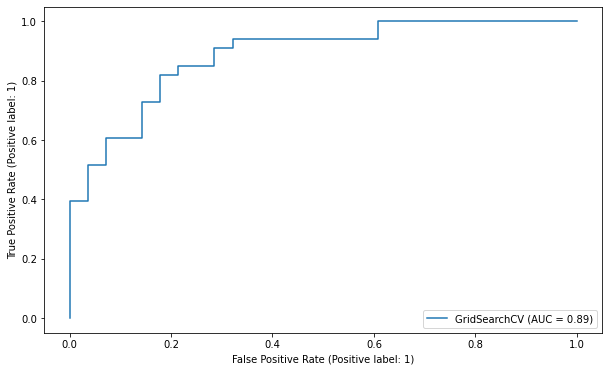

In [73]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

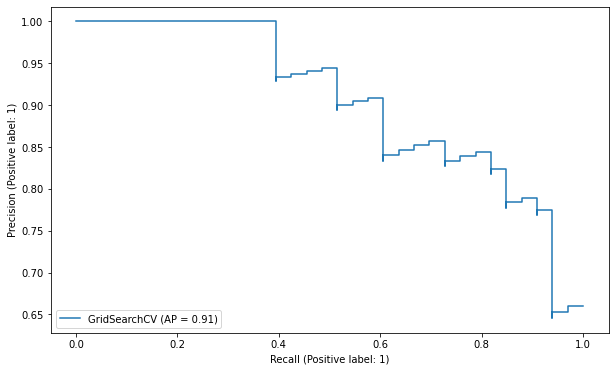

In [74]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

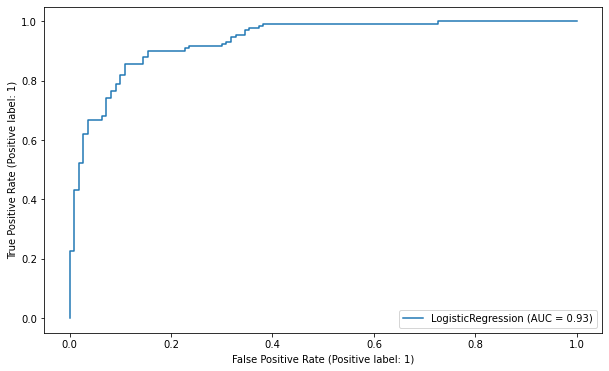

In [75]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [76]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.934297520661157

In [77]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [78]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6257705278989177

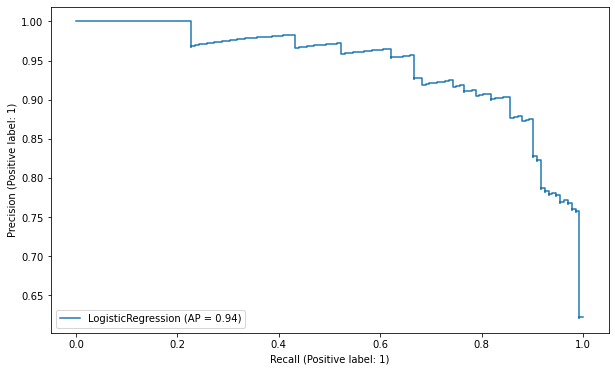

In [79]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [80]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.942199116904346

In [81]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [82]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5637446006772351

In [83]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.06563504, 0.15352948, 0.01581271, 0.78676521, 0.56259363,
       0.08598288, 0.90165974, 0.30739798, 0.97563347, 0.47364794,
       0.14315529, 0.57981611, 0.0868278 , 0.94353563, 0.97501904,
       0.83603215, 0.9536967 , 0.68584273, 0.77057192, 0.68186394,
       0.80347776, 0.1972433 , 0.91594198, 0.8686973 , 0.91089739,
       0.03766792, 0.15836346, 0.56318254, 0.26347161, 0.82615939,
       0.12924189, 0.80894987, 0.44523645, 0.10586377, 0.01269076,
       0.5139816 , 0.5598304 , 0.93073259, 0.94949788, 0.13148403,
       0.3175633 , 0.9000485 , 0.97592533, 0.56219661, 0.15291193,
       0.39830153, 0.92560364, 0.54959411, 0.6387362 , 0.90330652,
       0.62959528, 0.90032258, 0.53665796, 0.01837542, 0.90970603,
       0.96811384, 0.94100995, 0.60649415, 0.03665447, 0.07814457,
       0.88576251])

In [84]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [85]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[23  5]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [86]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 94  16]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.88      0.88      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



## Final Model and Model Deployment

In [87]:
scaler = StandardScaler().fit(X)

In [88]:
import pickle
pickle.dump(scaler, open("scaler_heart_stroke", 'wb'))

In [89]:
X_scaled = scaler.transform(X)

In [90]:
final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)

In [91]:
pickle.dump(final_model, open("final_model_heart_stroke", 'wb'))

In [92]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200
ca,303.000,0.729,1.023,0.000,0.000,0.000,1.000,4.000
sex_1,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp_1,303.000,0.165,0.372,0.000,0.000,0.000,0.000,1.000
cp_2,303.000,0.287,0.453,0.000,0.000,0.000,1.000,1.000
cp_3,303.000,0.076,0.265,0.000,0.000,0.000,0.000,1.000


# Implement KNN and Evaluate

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Modelling

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [96]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [98]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [99]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.600,0.400
1,0.600,0.400
2,1.000,0.000
3,0.200,0.800
4,0.600,0.400
...,...,...
56,0.400,0.600
57,0.200,0.800
58,1.000,0.000
59,1.000,0.000


In [100]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [101]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
160,1,1,1.000,0.000
268,0,0,0.000,1.000
131,1,1,1.000,0.000
61,1,1,0.600,0.400
51,1,0,0.400,0.600
102,1,1,1.000,0.000
28,1,1,0.800,0.200
302,0,1,0.800,0.200
123,1,1,1.000,0.000
179,0,0,0.400,0.600


## Model Performance on Classification Tasks

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [103]:
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 6, 27]], dtype=int64)

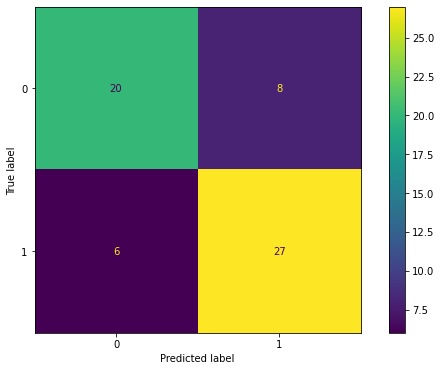

In [104]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Elbow Method for Choosing Reasonable K Values

In [106]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [107]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

# Visually compare models based on your chosen metric

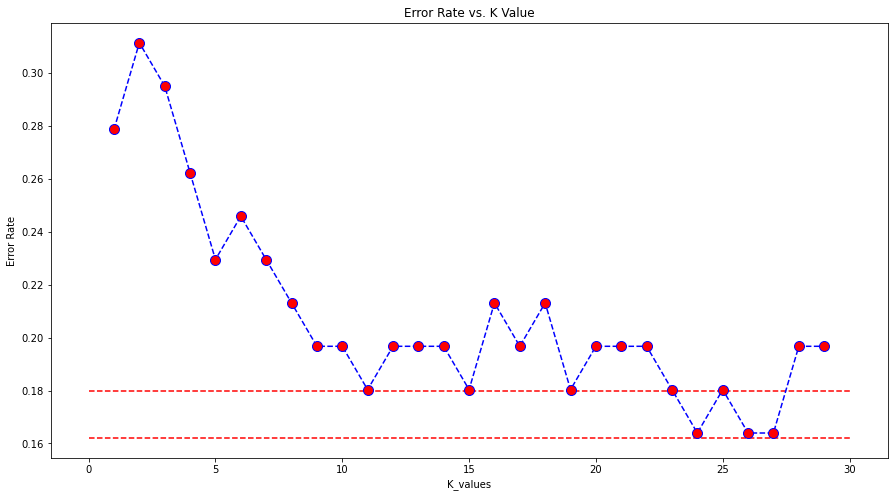

In [112]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.180, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.162, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

## Scores by Various K Values

In [125]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [126]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[19  9]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [127]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set

[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 95  15]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.89      0.89      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [128]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled,y_train)
print('WITH K=11\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=11

Test_Set

[[21  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set

[[ 94  16]
 [ 20 112]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.88      0.85      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [129]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[21  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set

[[ 92  18]
 [ 20 112]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.86      0.85      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [130]:
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train_scaled,y_train)
print('WITH K=24\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=24

Test_Set

[[22  6]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Train_Set

[[ 91  19]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.85      0.84      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242



## Cross Validate For Optimal K Value

In [131]:
from sklearn.model_selection import cross_val_score, cross_validate

In [136]:
model = KNeighborsClassifier(n_neighbors=15)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.004,0.800,0.846,0.786,0.815
2,0.001,0.004,0.760,0.786,0.786,0.786
3,0.001,0.004,0.750,0.733,0.846,0.786
4,0.001,0.004,0.917,0.867,1.000,0.929
5,0.001,0.003,0.917,0.923,0.923,0.923
6,0.000,0.003,0.750,0.733,0.846,0.786
7,0.000,0.004,0.833,0.909,0.769,0.833
8,0.001,0.003,0.833,0.909,0.769,0.833
9,0.000,0.004,0.833,0.909,0.769,0.833
10,0.000,0.004,0.875,0.857,0.923,0.889


In [137]:
df_scores.mean()[2:]

test_accuracy    0.827
test_precision   0.847
test_recall      0.842
test_f1          0.841
dtype: float64

# Chose best model and make a random prediction 

## Gridsearch Method for Choosing Reasonable K Values

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
knn_grid = KNeighborsClassifier()

In [140]:
k_values= range(1,30)

In [141]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}  #1:Manhattan 2:Euclidian Minkowski

In [142]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [143]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [144]:
knn_grid_model.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

In [145]:
print('WITH K=7\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set

[[19  9]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 95  15]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.89      0.88      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



## Evaluating ROC Curves and AUC

In [146]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [147]:
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train_scaled, y_train)

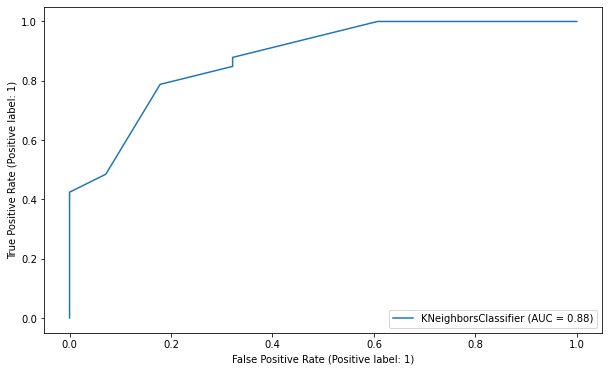

In [148]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [149]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8787878787878788

## Final Model and Model Deployment

In [150]:
import pickle

In [151]:
scaler = StandardScaler()

In [152]:
scaler.fit(X)

StandardScaler()

In [153]:
X_scaled = scaler.transform(X)

In [154]:
final_knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_scaled,y)

In [155]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [156]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

## Predict New Observations

In [157]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [158]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [159]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [160]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [161]:
new_obs = {'age': [15, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [120, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [162]:
samples = pd.DataFrame(new_obs)
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [163]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-4.34166707, -0.66386682, -2.24685838, -3.04569256,  1.95003362,
         1.24459328, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
        -0.41763453,  0.9967051 , -0.11566299, -0.69663055,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-3.79022294, -0.03562488, -1.8989997 ,  2.20196803,  2.98526828,
         0.26508221, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394438  , -1.00330579,  8.64580823,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-1.80502406,  0.24993964, -1.78304681,  0.36528682, -0.29297483,
         3.20361543,  0.68100522, -0.44455422,  1.57567719, -0.28660575,
         2.394438  ,  0.9967051 , -0.11566299,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-1.36386876,  0.47839125, -0.97137655, -2.38973499,  1.17360762,
        -0.71442887, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394

In [164]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=7)

In [165]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [166]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.571,0.429
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,...,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.143,0.857
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,...,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.714,0.286
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.857,0.143
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.143,0.857
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,...,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.143,0.857
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.143,0.857
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,...,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.429,0.571
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.143,0.857
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,...,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0.286,0.714
